In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data/raw'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


In [2]:
data =  pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Несколько категориальных признаков:
- cp: chest pain type
- restecg: resting electrocardiographic results
- slope: the slope of the peak exercise ST segment
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Количественные признаки:
- age
- trestbps
- chol
- thalach
- oldpeak
- ca

Бинарные признаки:
- sex
- fbs
- exang


In [6]:
binary_features = ['sex', 'fbs', 'exang']
quantative_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_features = ['cp', 'restecg', 'slope', 'thal']

Посмотрим на распределение количественных признаков в разрезе таргета.

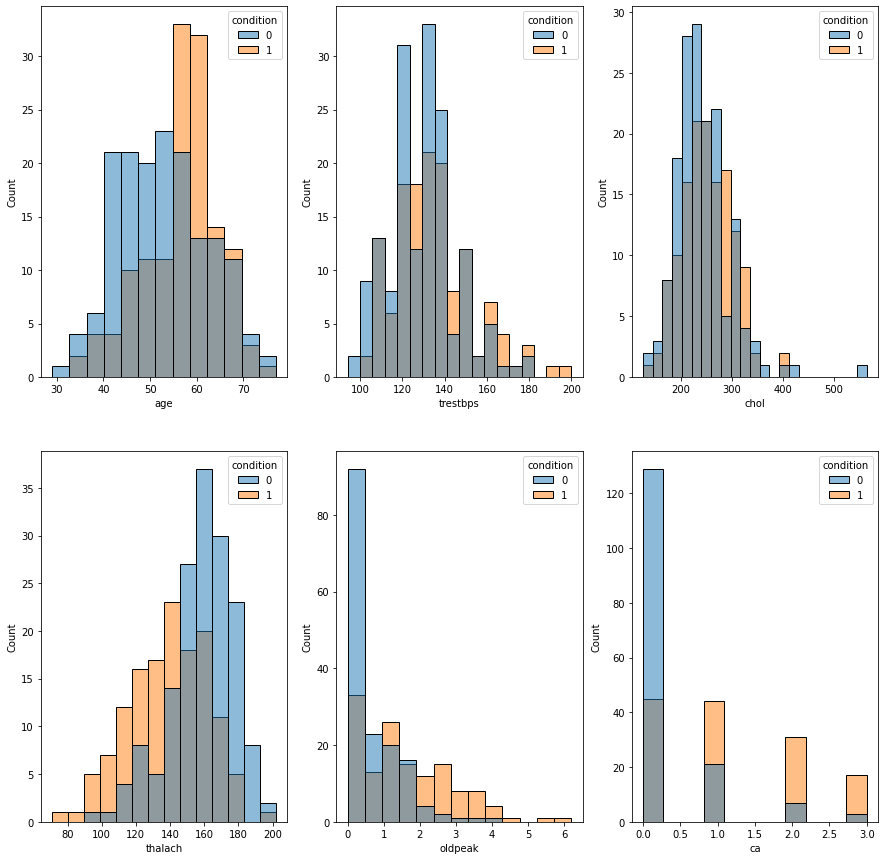

In [23]:
ncols = len(quantative_features) // 2
nrows = 2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, feature in enumerate(quantative_features):
    sns.histplot(data=data, x=feature, ax=axs[i // ncols][i % ncols], hue='condition')

Признаки `thalach` и `chol` распределены практически нормально. Возраст имеет сильно больше респондентов от 50 до 60, распределение несимметричено относительно пика. `ca` можно было бы отнести к категиориальным признакам. Но по смыслу он все же количественный 
> ca: number of major vessels (0-3) colored by flourosopy

 Из графика по `age` видно, что болеют более пожилые люди чаще молодых. `oldpeak` и `ca` также смещены вправо для болеющих. А `thalach` -- наоборот, смещен для больных влево.

Посмотрим на категориальные признаки

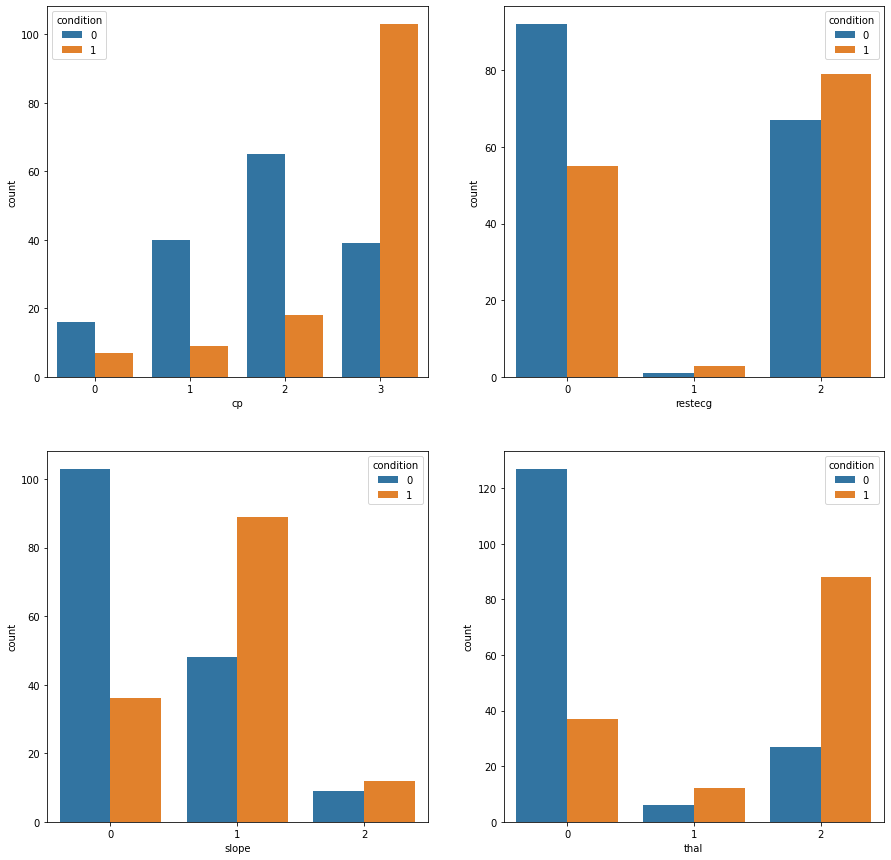

In [17]:
ncols = len(categorical_features) // 2
nrows = 2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axs[i // ncols][i % ncols], hue='condition')

Заметно, что в некоторых категориях есть лейблы, в которых существенно меньше экземпляторв, чем в остальных.

`thal==0` характерен для здоровых, а `thal=1, thal=2` -- больше для больных.

Также для больных характерно `cp=3`.

Остались бинарные признаки

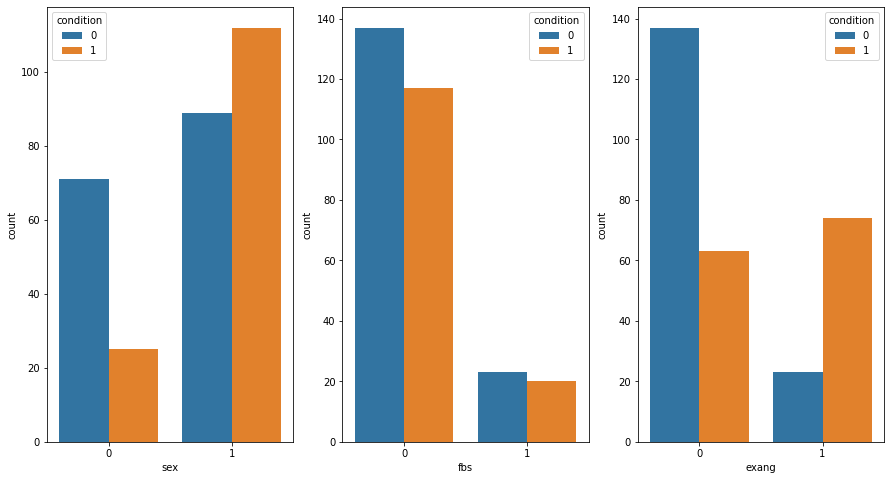

In [22]:
ncols = len(binary_features)
fig, axs = plt.subplots(ncols=ncols)
fig.set_figheight(8)
fig.set_figwidth(15)
for i, feature in enumerate(binary_features):
    sns.countplot(data=data, x=feature, ax=axs[i], hue='condition')

sex: sex (1 = male; 0 = female)
Больных в относительных величинах сильно больше среди мужчин, чем среди женщин. Также глобально в выборке больше мужчин.

## Посчитаем корреляции между признаками

Тут мы не убрали из датафрейма target, чтобы прикинуть и корреляции с ним

<AxesSubplot:>

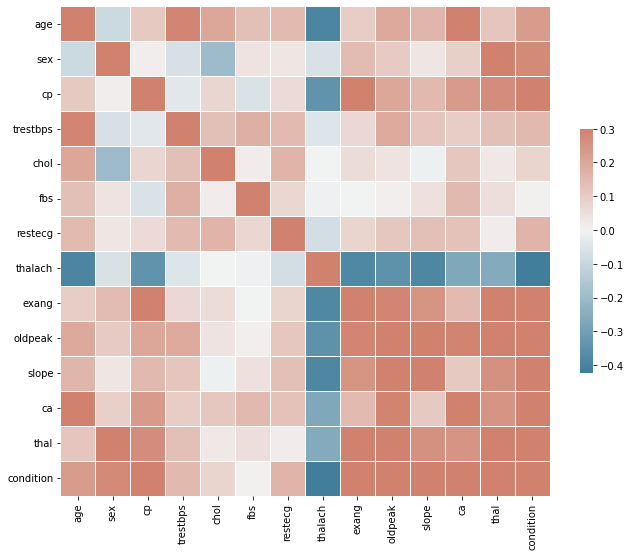

In [29]:
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Проверка на отсутствующие значения

In [26]:
data.isna().sum(axis=0)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Отсутствующих значений нет.

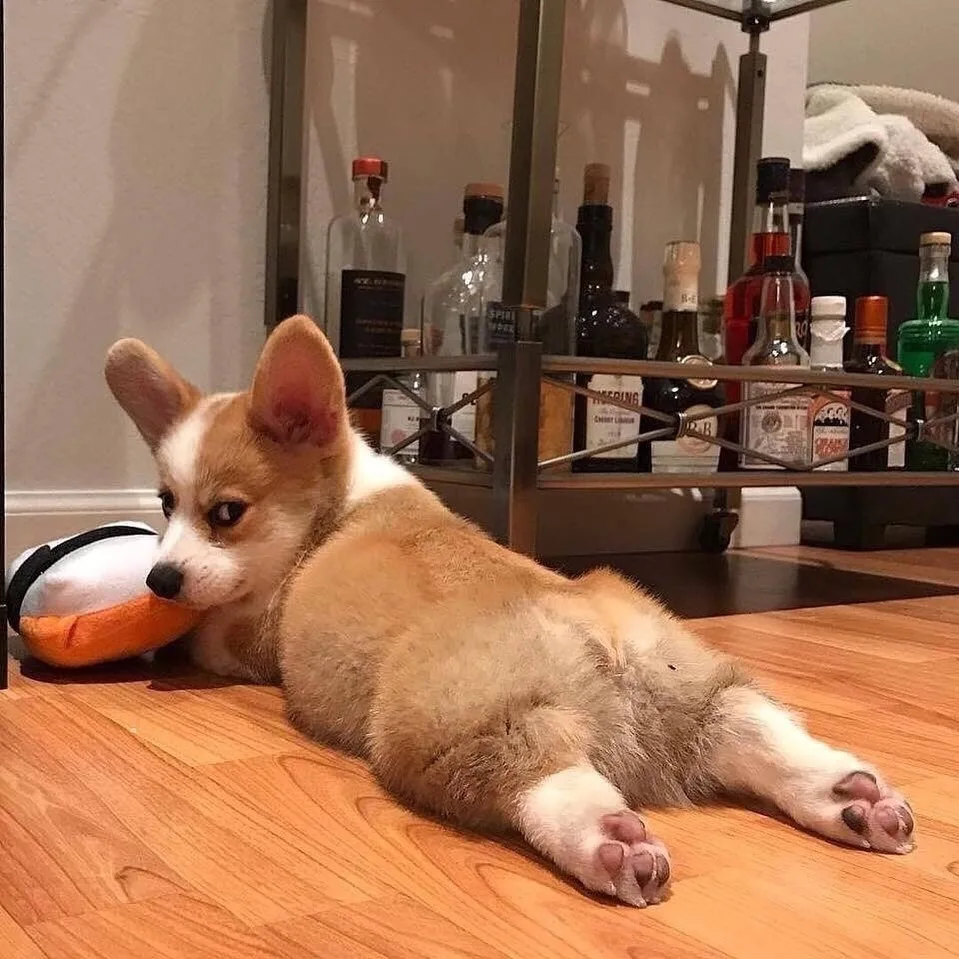